In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [2]:
historical = pd.read_csv('./Nat_Gas.csv', parse_dates=['Dates'], dayfirst=True)
display(historical)

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


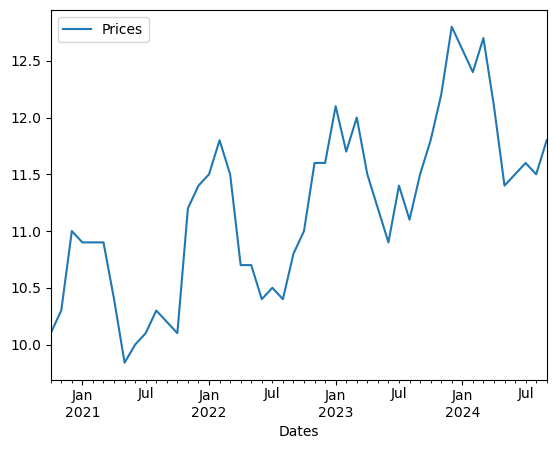

In [3]:
historical.plot(x ='Dates',y=['Prices'] ,kind='line')
plt.show()

In [4]:
historical.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


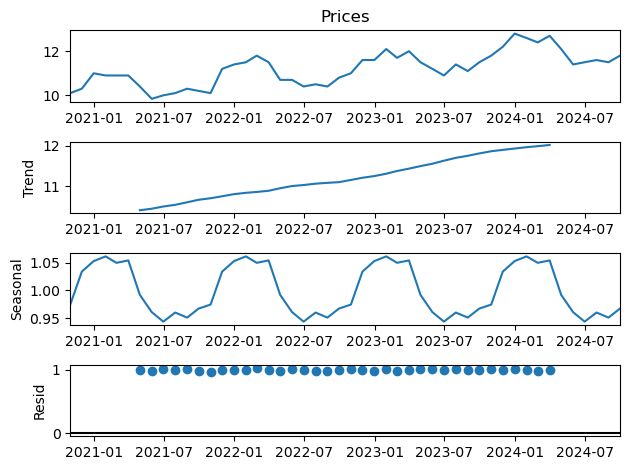

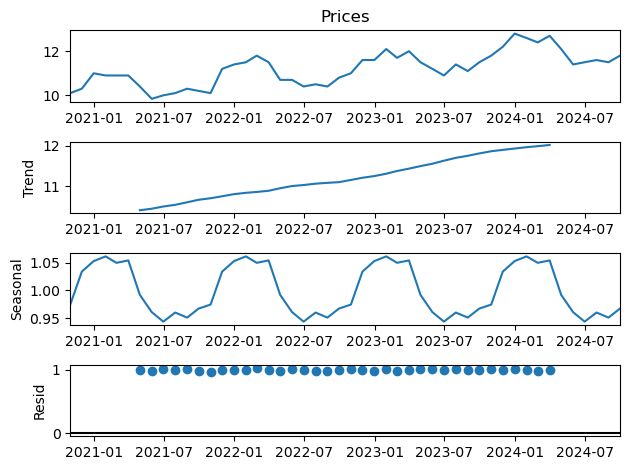

In [5]:
historical.set_index('Dates', inplace=True)
analysis = seasonal_decompose(historical['Prices'], model='multiplicative',period = 12)
analysis.plot()

In [42]:
daily_dates = pd.date_range(start = historical.index.min(), end = '2025-09-30', freq='D')
Daily = pd.DataFrame(index = daily_dates, columns = ['Days'])
Daily['Days'] = range(1, 1797)

In [43]:
trend = analysis.trend
Daily['Trends'] = trend

In [44]:
valid_data = Daily[Daily['Trends'].notna()]
x_valid = valid_data[['Days']]
y_valid = valid_data['Trends']  
model = LinearRegression()
model.fit(x_valid, y_valid)

LinearRegression()

In [47]:
missing_data = Daily[Daily['Trends'].isna()]
x_missing = missing_data[['Days']] 
predicted_trends = model.predict(x_missing)
Daily.loc[Daily['Trends'].isna(), 'Trends'] = predicted_trends

In [48]:
display(Daily)

,Days,Trends
2020-10-31,1,10.111982
2020-11-01,2,10.113525
2020-11-02,3,10.115068
2020-11-03,4,10.116611
2020-11-04,5,10.118154
...,...,...
2025-09-26,1792,12.875439
2025-09-27,1793,12.876982
2025-09-28,1794,12.878525
2025-09-29,1795,12.880068


In [53]:
seasonal_daily = analysis.seasonal.resample('D').interpolate(method='spline', order=2)
Daily['Seasonal'] = seasonal_daily
Daily['Seasonal'].iloc[-366:] = Daily['Seasonal'].iloc[:366].values

/var/folders/fd/h9d9q71j1lv7x050g9gkh5ym0000gn/T/ipykernel_37300/3227355118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily['Seasonal'].iloc[-366:] = Daily['Seasonal'].iloc[:366].values


In [54]:
Daily['Predicted_Prices'] = Daily['Trends'] * Daily['Seasonal']
display(Daily)

,Days,Trends,Seasonal,Predicted_Prices
2020-10-31,1,10.111982,0.974430,9.853423
2020-11-01,2,10.113525,1.010205,10.216733
2020-11-02,3,10.115068,1.010196,10.218202
2020-11-03,4,10.116611,1.010187,10.219672
2020-11-04,5,10.118154,1.010178,10.221141
...,...,...,...,...
2025-09-26,1792,12.875439,1.006297,12.956519
2025-09-27,1793,12.876982,1.006284,12.957905
2025-09-28,1794,12.878525,1.006271,12.959291
2025-09-29,1795,12.880068,1.006258,12.960677


In [55]:
Daily.to_csv('Daily_Prices.csv', index=False)